In [3]:
# 출처: 혼자 공부하는 머신러닝 + 딥러닝

# k-최근접 이웃(K-NN, K-Nearest Neighbor) 회귀

In [4]:
# 농어의 길이, 높이, 두께 측정 데이터 -> 무게 예측, 정확한 무게 측정 농어 데이터는 56개
# k-최근접 이웃 알고리즘이 회귀에도 작동한다.

In [5]:
# 데이터 준비
import numpy as np
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

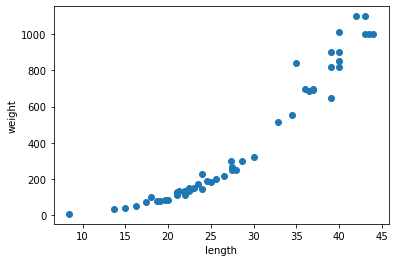

In [6]:
import matplotlib.pyplot as plt

plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [7]:
# 농어 데이터 split, 훈련 세트 & 테스트 세트
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42) # 여기선 weight이 타겟인거고 알아서 각각 랜덤으로 분리되어 들어감

In [8]:
train_input.shape

(42,)

In [9]:
# 사이킷런에 사용할 훈련 세트는 2d array여야하기 때문에 reshape해준다
# train_input = train_input.reshape(42,1)
train_input = train_input.reshape(-1,1) # 크기에 -1을 지정 -> 나머지 원소 개수로 모두 채우라는 뜻
test_input = test_input.reshape(-1,1)
# train_input

In [10]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()

# KNN 모델 훈련
knr.fit(train_input, train_target)

KNeighborsRegressor()

In [11]:
print(knr.score(test_input, test_target))

0.992809406101064


In [12]:
from sklearn.metrics import mean_absolute_error

# 테스트 세트에 대한 예측을 만듦
test_prediction = knr.predict(test_input)
# 테스트 세트에 대한 평균 절댓값 오차 계산
mae = mean_absolute_error(test_target, test_prediction)
print(mae)

19.157142857142862


In [13]:
print(knr.score(train_input, train_target))

0.9698823289099254


- 모델을 훈련세트로 훈련하면 -> 그 훈련세트에 잘 맞는 모델이 만들어짐.
    - 만약, 훈련세트에서 점수 굿 && 테스트세트에서 점수 bad -> 모델이 훈련 세트에 과대적합(Overfitting)되었다고 함.
    - 반대로, 훈련세트점수 << 테스트세트 점수 거나, 두 점수 모두 low...-> 모델이 훈련 세트에 과소적합(Underfitting)되었다고 함.
        - 원인: 모델이 너무 단순해서 훈련세트에 대해 적절히 훈련되지 않은 경우 or 훈련세트와 테스트 세트의 크기가 매우 작은 경우

In [14]:
# 문제 해결 how? -> 모델을 더 복잡하게 만들자. 훈련세트에 더 잘 맞게 만들기!
# KNN알고리즘에서는, 이웃의 개수 K를 줄이는 것이 모델을 더 복잡하게 만드는 방법이다.
    # (K down->훈련세트의 국지적인 패턴에 민감, K up->데이터 전반에 있는 일반적인 패턴을 따를 것임.)
knr.n_neighbors = 3
knr.fit(train_input, train_target)
print(knr.score(train_input, train_target))
print(knr.score(test_input, test_target))

0.9804899950518966
0.9746459963987609


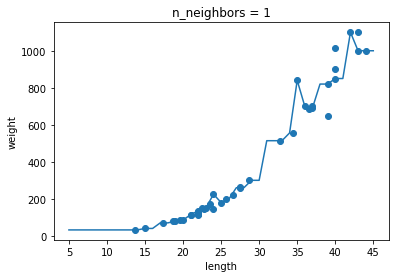

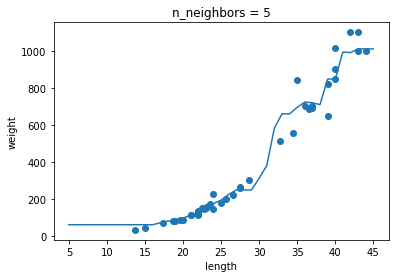

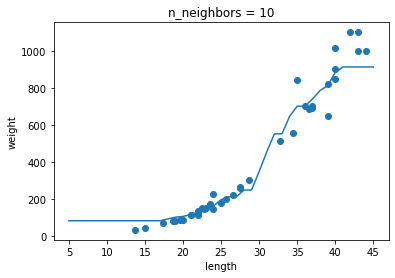

In [15]:
knr = KNeighborsRegressor()
x = np.arange(5,46).reshape(-1,1)
for n in [1,5,10]:
    knr.n_neighbors = n
    knr.fit(train_input, train_target)
    # 지정한 범위 x에 대한 예측값 구하기
    prediction = knr.predict(x)
    # 훈련 세트와 예측 결과를 그래프로 그리기
    plt.scatter(train_input, train_target)
    plt.plot(x, prediction)
    plt.title('n_neighbors = {}'.format(n))
    plt.xlabel('length')
    plt.ylabel('weight')
    plt.show()

- n값이 커짐에 따라 모델이 단순해짐

### 연습코드 + 추가메모

- 데이터가 클수록 파이썬 리스트는 비효율적이므로 넘파이 배열을 사용하는게 좋음.
- 파이썬 튜플은 원소가 하나면 원소 뒤에 콤마를 추가함. ex) (3,)
- 파이썬에서 1차원 넘파이 배열의 크기는 원소가 1개인 튜플로 나타냄.
- 사이킷런의 score() 메서드가 출력하는 값은 높을수록 좋음. ex) 정확도, 결정계수
    - if 이 메서드가 에러율을 반환한다면 이를 음수로 만들어서 실제로는 낮은 에러가 score()메서드로 반환될 때는 높은 값이 되도록 바꿈

In [16]:
test = np.array([1,2,3,4])
print(test)
print(test.shape)

[1 2 3 4]
(4,)


In [17]:
# test = test.reshape(2,2)
test = np.reshape(test, (2,2)) # 동일한 표현
print(test)
print(test.shape)

[[1 2]
 [3 4]]
(2, 2)


# 선형 회귀

In [18]:
import numpy as np
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [19]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state= 42)

train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

In [20]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors = 3)
knr.fit(train_input, train_target)

KNeighborsRegressor(n_neighbors=3)

In [21]:
print(knr.predict([[50]])) # 길이가 50인 농어의 무게 예측값! 여기도 훈련세트처럼 2d array로 넣어준다

[1033.33333333]


In [22]:
# KNeighborsClassifier 클래스는 주어진 샘플에서 가장 가까운 이웃을 찾아주는 kneighbors()메서드를 제공함.

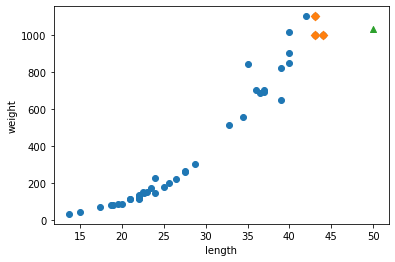

In [23]:
distances, indexes = knr.kneighbors([[50]]) # n_neighbors = 3으로 만든 모델이니까... 길이 50인 놈으로부터 젤 가까운 놈들 3개의 정보들이 나올 것
plt.scatter(train_input, train_target)

# 이웃 샘플만 다시 그리기
plt.scatter(train_input[indexes], train_target[indexes], marker='D')

# 50cm 농어
plt.scatter([[50]], 1033, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [24]:
distances, indexes

(array([[6., 7., 7.]]), array([[34,  8, 14]], dtype=int64))

In [25]:
print(np.mean(train_target[indexes]))

1033.3333333333333


- !!! 문제점 !!! 새로운 샘플이 훈련 세트의 범위를 벗어나면 엉뚱한 값을 예측할 수 있음.
- 이유: KNN은 가장 가까운 샘플을 찾아 타깃을 평균하기 때문

In [26]:
print(knr.predict([[1000]])) # 이처럼 길이가 1000cm인 농어가 들어와도 여전히... 1033g로 예측함

[1033.33333333]


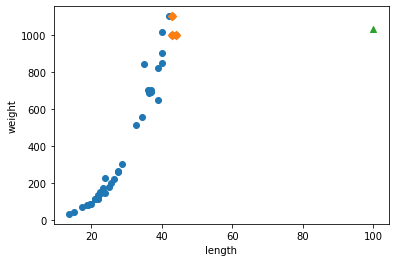

In [27]:
# 한번 더 G 그려서 확인해보기
distance, indexes = knr.kneighbors([[100]])

plt.scatter(train_input, train_target)
plt.scatter(train_input[indexes], train_target[indexes], marker='D')
plt.scatter([[100]], 1033, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

=> KNN말고 다른 알고리즘을 사용해야겠다는 판단을 함!!

In [28]:
# 드디어 선형회귀
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_input, train_target)
print(lr.predict([[50]]))

[1241.83860323]


In [29]:
print(lr.coef_, lr.intercept_)

[39.01714496] -709.0186449535477


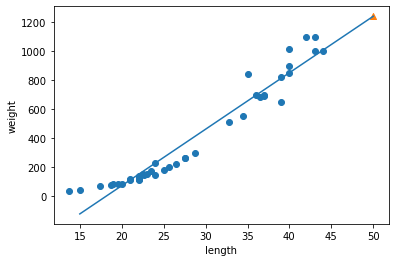

In [30]:
# 산점도랑 선형회귀직선 같이 그리기
plt.scatter(train_input, train_target)
# 농어의 길이 15~50까지 1차 방정식 그래프로 그리기
plt.plot([15, 50], [15*lr.coef_+lr.intercept_, 50*lr.coef_+lr.intercept_])
# 50cm 농어 데이터
plt.scatter(50, 1241, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [31]:
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.939846333997604
0.8247503123313558


- 모델이 훈련세트에 과대적합 되었다기보다는.... 훈련세트의 점수도 높지 않기 때문에 ....... 오히려 전체적으로 과소적합되었다고 볼 수 있음.
- 글고 선형 회귀로 만든 직선이 왼쪽 아래로 쭉 뻗어있음 -> 0g이하 무게인 경우도 나올수있다는겨 => 현실성 X
- 최적의 곡선을 찾아봅세다
  - => 길이를 제곱한 항이 훈련 세트에 추가되어야 함!
  - column_stack() 함수를 사용하자!

In [32]:
train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))

In [33]:
print(train_poly.shape, test_poly.shape)

(42, 2) (14, 2)


- train_input ** 2 식에도 넘파이 브로드캐스팅이 적용된다. 즉, train_input에 있는 모든 원소를 제곱한다.

In [34]:
# 열 추가한 train데이터로 선형 회귀 모델 다시 훈련하기
lr.fit(train_poly, train_target)
print(lr.predict([[50**2, 50]]))

[1573.98423528]


In [35]:
print(lr.coef_, lr.intercept_)

[  1.01433211 -21.55792498] 116.05021078278259


2차 방정식이라고 해서 비선형이 아님 주의! 길이^2도 어차피 딴 변수로 치환하면 ... 선형관계라 할 수 있다

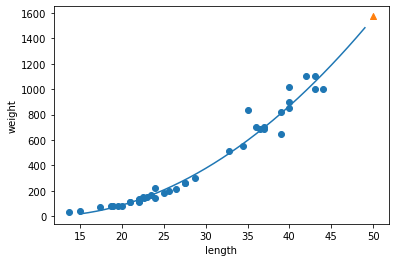

In [36]:
# 이처럼 다항식을 사용한 선형 회귀를 '다항 회귀'라고 부름
# 위 숫자들이 2차 방정식의 계수임 -> 그래프 그릴 수 있따

# 구간별 직선을 그리기 위한 정수 배열 생성
point = np.arange(15, 50)
# 훈련 세트의 산점도를 그린다.
plt.scatter(train_input, train_target)
# 15~49까지 2차 방정식 그래프를 그린다.
plt.plot(point, 1.01*point**2 - 21.6*point + 116.05)

# 50cm농어
plt.scatter(50, 1573, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [37]:
# much better!! R^2 점수 평가해보자
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))
# 훈련 세트와 테스트 세트에 대한 점수가 크게 높아지긴 했지만, 여전히 테스트 세트의 점수가 좀 더 높다. -> 과소적합이 아직 남아있는듯

0.9706807451768623
0.9775935108325121


# 특성 공학과 규제

In [38]:
# 다중 회귀: 여러 개의 특성을 사용한 선형 회귀
# 농어의 길이 + 높이 + 두께를 함께 사용해봅시다
# 특성 공학(feature engineering): 기존의 특성을 사용해 새로운 특성을 뽑아내는 작업
import pandas as pd
df = pd.read_csv('https://bit.ly/perch_csv_data')
perch_full = df.to_numpy()
# print(perch_full)

In [39]:
import numpy as np
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [40]:
train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state=42)

In [41]:
from sklearn.preprocessing import PolynomialFeatures

# 해당 변환기 사용 예시
poly = PolynomialFeatures(include_bias=False)
poly.fit([[2,3]])
print(poly.transform([[2,3]]))
# transform 전에 fit을 해줘야한다!!

[[2. 3. 4. 6. 9.]]


In [42]:
# 실제 적용
poly = PolynomialFeatures(include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
print(train_poly.shape)

(42, 9)


In [44]:
poly.get_feature_names()

['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2', 'x2^2']

In [45]:
test_poly = poly.transform(test_input)

In [46]:
# 다중 회귀 모델 훈련하기. => 선형 회귀 모델 훈련하는거랑 똑같음 but 여러 개의 특성을 사용하여 선형 회귀를 수행하는 것일 뿐!
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

0.9903183436982125


In [ ]:
print(lr.score(test_poly, test_target))

0.9714559911594111


In [ ]:
# 특성 더 추가하기
poly = PolynomialFeatures(degree=5, include_bias=False) # 5제곱까지 특성 만들기
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
print(train_poly.shape)

(42, 55)


In [ ]:
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9999999999996433
-144.40579436844948


In [ ]:
# 오버피팅!!!!! 여기서 사용한 훈련 세트의 샘플 개수는 42개인데 55개의 특성으로 훈련한 경우임
# 규제를 배워봅시다. 규제? 머신러닝 모델이 훈련 세트에 과대적합되지 않도록 만드는 것
# 모델의 계수를 규제해서 훈련세트의 점수를 낮추는 대신 테스트 세트의 점수를 높여 보자

# but 중요: 규제를 적용하기 전에 정규화를 해야한다.
# 2장에서는 평균과 표준편차 직접 구해서 특성을 표준점수로 바꿨는데, 사이킷런에서 제공하는 StandardScaler를 사용해보자 -> 변환기의 일종

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

In [ ]:
# 선형 회귀 모델에 규제를 추가한 모델: 릿지, 라쏘 // 두 모델은 규제를 가하는 방법이 다름
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9896101671037343
0.9790693977615387


In [ ]:
# 규제의 양 조절하기
import matplotlib.pyplot as plt
# alpha값 바꿀때마다 score()메서드의 결과를 저장할 리스트
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
  # 릿지 모델 만들고 훈련하기
  ridge = Ridge(alpha = alpha)
  ridge.fit(train_scaled, train_target)
  # 훈련 점수와 테스트 점수 저장
  train_score.append(ridge.score(train_scaled, train_target))
  test_score.append(ridge.score(test_scaled, test_target))

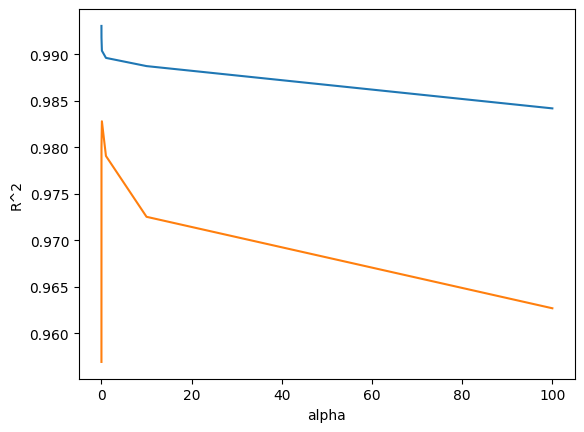

In [ ]:
plt.plot((alpha_list), train_score)
plt.plot((alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

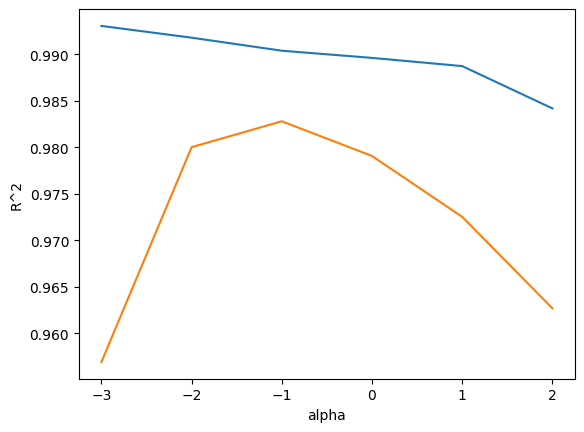

In [ ]:
plt.plot(np.log10(alpha_list), train_score)
# 중요!! 그냥 alpha_list를 x축에 넣으면 위에처럼 그래프 왼쪽이 넘 촘촘하니까->값들을 등간격으로 맞춰주기 위해 로그함수로 바꿔서->지수로 표현
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

- 왼쪽은 훈련vs테스트 세트 점수 차이 짱큼 -> 전형적인 과대적합
- 오른쪽은 훈련vs테스트 세트 점수 모두 낮아짐 -> 전형적인 과소적합
- 따라서 적절한 알파값은 ... 두 그래프가 가장 가깝고 테스트 세트의 점수가 가장 높은 -1, 즉 10^-1 = 0.1이다!!!
- alpha = 0.1로 해서 최종 모델을 훈련해보자~~!

In [ ]:
ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9903815817570367
0.9827976465386928


In [ ]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.989789897208096
0.9800593698421883


In [ ]:
# alpha값 바꿀때마다 score()메서드의 결과를 저장할 리스트
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
  # 라쏘 모델 만들고 훈련하기
  lasso = Lasso(alpha = alpha)
  lasso.fit(train_scaled, train_target)
  # 훈련 점수와 테스트 점수 저장
  train_score.append(lasso.score(train_scaled, train_target))
  test_score.append(lasso.score(test_scaled, test_target))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.336e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.025e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.062e+02, tolerance: 5.183e

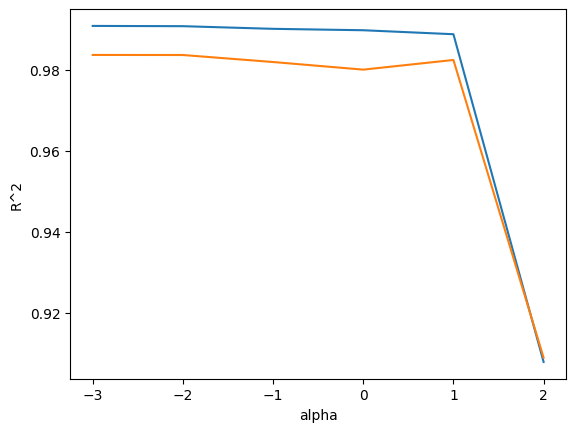

In [ ]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

### 용어, 개념 알기
- 사이킷런에는 변환기라 부르는 특성을 만들거나 전처리하는 클래스가 있음.
- 여기서는 PolynomialFeatures 클래스를 변환기로 사용할 것임.